In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error, explained_variance_score, max_error, d2_absolute_error_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from surprise import SVD, Reader, Dataset
from collections import defaultdict
import gzip
from surprise import SVDpp

### TRAIN DATASET

In [2]:
df_train = pd.read_csv('interactions_train.csv')

In [3]:
df_train.head()

,user_id,recipe_id,date,rating,u,i
0,2046,4684,2000-02-25,5.0,22095,44367
1,2046,517,2000-02-25,5.0,22095,87844
2,1773,7435,2000-03-13,5.0,24732,138181
3,1773,278,2000-03-13,4.0,24732,93054
4,2046,3431,2000-04-07,5.0,22095,101723


<Axes: xlabel='rating', ylabel='Count'>

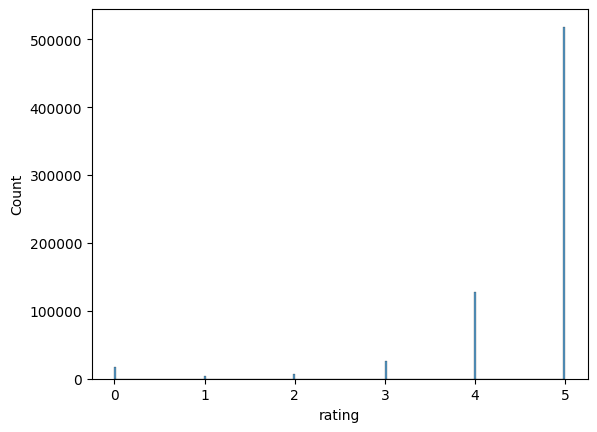

In [4]:
sns.histplot(data=df_train['rating'])

### TEST DATASET

In [5]:
df_test = pd.read_csv('interactions_test.csv')

### CODE

In [6]:
df_train = df_train[['rating', 'u', 'i']]
df_train.head()

,rating,u,i
0,5.0,22095,44367
1,5.0,22095,87844
2,5.0,24732,138181
3,4.0,24732,93054
4,5.0,22095,101723


In [7]:
df_train['rating'].value_counts()

rating
5.0    518568
4.0    127402
3.0     25781
0.0     16957
2.0      6852
1.0      3341
Name: count, dtype: int64

In [8]:
df_balanced = pd.concat([
    df_train[df_train['rating'] == 5.0].sample(n=25000, random_state=42),  # Sample 50k 5.0 ratings
    df_train[df_train['rating'] == 4.0].sample(n=25000, random_state=42),  
    df_train[(df_train['rating'] != 5.0) & (df_train['rating'] != 4.0)]  # Include all other ratings
])

In [9]:
df_balanced['rating'].value_counts()

rating
3.0    25781
5.0    25000
4.0    25000
0.0    16957
2.0     6852
1.0     3341
Name: count, dtype: int64

<Axes: xlabel='rating', ylabel='Count'>

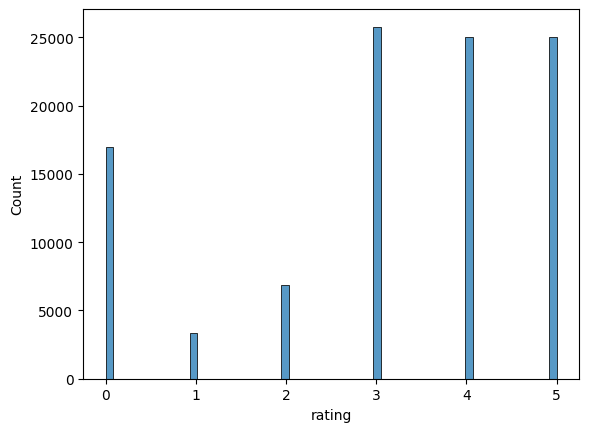

In [16]:
sns.histplot(data=df_balanced['rating'])

In [ ]:
reader = Reader(rating_scale=(0, 5))

data = Dataset.load_from_df(df_balanced, reader=reader)

trainset = data.build_full_trainset()

model = SVD()

model.fit(trainset)

In [11]:
df_test['rating'].value_counts()

rating
5.0    7586
4.0    2807
3.0     815
0.0     687
2.0     311
1.0     249
Name: count, dtype: int64

In [ ]:
test = df_balanced.to_dict(orient='records')
preds = []
y_true = []
count = 0
for x in test:
    # Predict the rating
    prediction = model.predict(uid=x['u'], iid=x['i'], verbose=False).est
    print(prediction)
    if count == 20:
        break
    count += 1
    # Append the predicted and true values
    preds.append(prediction)
    y_true.append(x['rating'])

5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5


In [13]:
type(preds[0])

surprise.prediction_algorithms.predictions.Prediction

In [14]:
preddf = pd.DataFrame(preds, dtype='float64')
preddf.value_counts()

TypeError: float() argument must be a string or a real number, not 'dict'

In [ ]:
mse = mean_squared_error(y_pred=preds, y_true=y_true)
mse

2.4106784423926135